# Project 1

Deadline: 3rd of November 2022

To do this project you have to complete this Jupyter notebook and send it via email or Discord.

The total number of points allocated for this project is 10.

You will need the following modules to solve the tasks:

In [1]:
import pandas as pd
import math
import numpy as np
from pprint import pprint
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import matplotlib.pyplot as plt

## I. Probabilities (1 point; 0.1 bonus points per week)

Filter the initial penguin data

In [2]:
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

In [3]:
#df = pd.read_csv("data/penguins.csv")
#df = df.drop(columns = [df.columns[0], df.columns[-1]])
#print(df.shape)
#df = df.dropna()
#print(df.shape)
#df = df_column_switch(df, "sex", "species")
#
#df.to_csv("data/penguins_filtered.csv", index = False)

We will use the [penguin dataset](https://allisonhorst.github.io/palmerpenguins/articles/intro.html). The purpose is to predict the species of a penguin using multiple features such as its sex, weight, the habitant island etc.

In [2]:
penguin_dataset = pd.read_csv("data/penguins_filtered.csv")
penguin_dataset.head()

,sex,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,male,Torgersen,39.1,18.7,181.0,3750.0,Adelie
1,female,Torgersen,39.5,17.4,186.0,3800.0,Adelie
2,female,Torgersen,40.3,18.0,195.0,3250.0,Adelie
3,female,Torgersen,36.7,19.3,193.0,3450.0,Adelie
4,male,Torgersen,39.3,20.6,190.0,3650.0,Adelie


1. Create two variables, `species_values` and `island_values` that will store values of the two random variables "Species" and "Island". (*Hint*: `numpy.unique`)

In [5]:
# solution here
species_values = np.unique(penguin_dataset["species"])
island_values = np.unique(penguin_dataset["island"])

print(species_values)
print(island_values)

['Adelie' 'Chinstrap' 'Gentoo']
['Biscoe' 'Dream' 'Torgersen']


2. Calculate the PMF of the two random variables.

In [6]:
# solution here
n_total_observations = penguin_dataset.shape[0]
species_pmf = {val : sum(penguin_dataset["species"] == val) / n_total_observations for val in species_values}
island_pmf = {val : sum(penguin_dataset["island"] == val) / n_total_observations for val in island_values}

print(species_pmf)
print(island_pmf)

{'Adelie': 0.43843843843843844, 'Chinstrap': 0.2042042042042042, 'Gentoo': 0.35735735735735735}
{'Biscoe': 0.4894894894894895, 'Dream': 0.36936936936936937, 'Torgersen': 0.14114114114114115}


3. We know that $P(Species = Gentoo, Island = Dream) = 0.20$ and $P(Species = Gentoo, Island = Torgersen) = 0.05735735$. Knowing that the penguin is from the Biscoe island, what is the probability that its species is Gentoo? (*Hint*: the formula of conditional probability and the law of total probability for multiple events)

In [7]:
# solution here
p_gentoo_dream = 0.2
p_gentoo_torgersen = 0.05735735

# use the formula of conditional probability to get P(Gentoo|Dream) and P(Gentoo|Torgersen)
cond_p_gentoo_dream = p_gentoo_dream / island_pmf["Dream"]
cond_p_gentoo_torgersen = p_gentoo_torgersen / island_pmf["Torgersen"]

# use the law of total probability to get P(Gentoo|Biscoe)
cond_p_gentoo_biscoe = (species_pmf["Gentoo"] - cond_p_gentoo_dream * island_pmf["Dream"] - cond_p_gentoo_torgersen * island_pmf["Torgersen"]) / island_pmf["Biscoe"]
print(cond_p_gentoo_biscoe)

0.20429449355828216


4. Calculate the average body mass of the penguins.

In [8]:
# solution here
average_body_mass = np.mean(penguin_dataset["body_mass_g"])
# sau
# average_body_mass = sum(penguin_dataset["body_mass_g"]) / len(penguin_dataset["body_mass_g"])
print(average_body_mass)

4207.057057057057


5. Calculate the variance of the distribution of penguins body mass.

In [9]:
# solution here
print(np.var(penguin_dataset["body_mass_g"]))
print(np.mean((penguin_dataset["body_mass_g"] - average_body_mass)**2))

646425.423170919
646425.423170919


## II. Entropy (2.5 points)

1. Create a function, `generate_probabilities`, that will take the observations of a discrete random variable and create the vector of probabilities that describe the PMF.

In [10]:
"""
Example: generate_probabilities([1,1,0,0,1,1,0,0,1,1]) should return [0.4, 0.6]
0.4 indicates P(X=0) and 0.6 P(X=1)

"""
def generate_probabilities(observations):
    values = np.unique(observations)
    n_observations = len(observations)

    return [len(np.where(observations == val)[0]) / n_observations for val in values]

2. Create a variable `pmf_species` that will store the probabilities for the target attribute "species" from the penguin dataset using the function from ex.1. 

In [11]:
# solution here
pmf_species = generate_probabilities(penguin_dataset["species"])
print(pmf_species)

[0.43843843843843844, 0.2042042042042042, 0.35735735735735735]


3. Create a function `calculate_entropy` that will take as argument the pmf of a discrete random variable and return its entropy. (*Hint*: use `math.log2` to calculate logarithms)

In [12]:
# be careful at the cases where a probability is 0
def calculate_entropy(probabilities):
    log_zero = lambda x: 0 if x == 0 else math.log2(x)
    return -sum(i*log_zero(i) for i in probabilities)

4. Create a variable `total_entropy_species` that will store the entropy of the target attribute "species".

In [13]:
# solution here
total_entropy_species = calculate_entropy(pmf_species)
print(total_entropy_species)

1.5200835543530913


5. Create a function `calculate_conditional_entropy` that will calculate the average conditionally entropy $H(X|Y)$. The function takes three arguments: the dataset containing the observations, the feature that describes the discrete random variable $Y$ and the feature that describes the discrete random variables $X$.

*Hint*:
- iterate through every unique value of Y; for each value you should
    - calculate the probability of that value
    - filter the dataset to keep only that value for Y
    - calculate the specific conditional entropy $H(X|Y=val)$


In [14]:
def calculate_conditional_entropy(dataset, feature, target_feature):
    n_observations = dataset.shape[0]
    feature_values = np.unique(dataset[feature])
    
    result = 0
    for feature_val in feature_values:
        filtered_dataset = dataset[dataset[feature] == feature_val]
        n_observations_value = filtered_dataset.shape[0]
        prob_feature_val = n_observations_value / n_observations
        
        target_feature_probs = generate_probabilities(filtered_dataset[target_feature].to_numpy().flatten())
        result += prob_feature_val * calculate_entropy(target_feature_probs)

    return result

print(calculate_conditional_entropy(penguin_dataset, "species", "island"))
print(calculate_conditional_entropy(penguin_dataset, "island", "species"))

0.692068871182391
0.7782324648463257


6. Create a function `calculate_information_gain` that will calculate the information gain $IG(H;Y)$ using the its definition and the functions `calculate_entropy` and `calculate_conditional_entropy`. The arguments are the same as in the `calculate_conditional_entropy` function.

In [15]:
def calculate_information_gain(dataset, feature, target_feature):
    target_probs = generate_probabilities(dataset[target_feature].to_numpy().flatten())
    total_entropy = calculate_entropy(target_probs)
    conditional_entropy = calculate_conditional_entropy(dataset, feature, target_feature)
    
    # print(conditional_entropy)
    return total_entropy - conditional_entropy

7. Calculate the information gains $IG(species;island)$ and $IG(species;sex)$.

In [16]:
# solution here
print(calculate_information_gain(penguin_dataset, "island", "species"))
print(calculate_information_gain(penguin_dataset, "sex", "species"))
print(calculate_information_gain(penguin_dataset, "species", "sex"))

0.7418510895067656
0.00010530129858543624
0.00010530129858543624


8. Based on the results, which of the attributes "sex" and "island" achieve a more qualitative separation of the "species" target attribute?

*Answer here: The information gain for the "Island" attribute is significantly higher than the "Sex" attribute (0.7418 vs 0.0001), so the first one should achieve a better separation of the "Species" target attribute.*

## III. Decision Tree - the discrete case (3 points)

1. Before running the ID3 algorihtm, we must quantify all the random variables. Quantify the "Species" target attribute using this following mapping: Adelie - 1, Chinstrap - 2, Gentoo - 3. (*Hint* check Panda's `replace` function.)

In [17]:
#solution here
penguin_dataset = penguin_dataset.replace({"Adelie": 1, "Chinstrap" : 2, "Gentoo": 3})

2. Using OneHot Encoders, convert the features "sex" and "island" to numerical values. You should add the new columns at the beginning of the table and remove the old ones. (*Hint*: check Panda's `drop` method to remove a column.)

In [18]:
# solution here
# one-hot the island attribute
cat_features = penguin_dataset[["island"]] # Note that we're selecting a matrix
enc = OneHotEncoder(sparse=False).fit(cat_features)
X_transformed = pd.DataFrame(enc.transform(cat_features), 
                           columns=enc.categories_[0])
penguin_dataset = pd.concat([X_transformed, penguin_dataset], axis = 1).drop(columns = "island")

# one-hot the sex attribute
cat_features = penguin_dataset[["sex"]] # Note that we're selecting a matrix
enc = OneHotEncoder(sparse=False).fit(cat_features)
X_transformed = pd.DataFrame(enc.transform(cat_features), 
                           columns=enc.categories_[0])
penguin_dataset = pd.concat([X_transformed, penguin_dataset], axis = 1).drop(columns = "sex")

3. For this discrete case we need only the discrete features. Filter the pandas dataframe and keep only the discrete columns (there should 6 of them). Keep the filtered dataset in a new variable, named `discrete_penguin_dataset`.

In [19]:
#solution here
discrete_penguin_dataset = penguin_dataset[["female", "male", "Biscoe", "Dream", "Torgersen", "species"]]
discrete_penguin_dataset.head()

,female,male,Biscoe,Dream,Torgersen,species
0,0.0,1.0,0.0,0.0,1.0,1
1,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,1.0,1
3,1.0,0.0,0.0,0.0,1.0,1
4,0.0,1.0,0.0,0.0,1.0,1


4. Find the root of the ID3 decision tree using the information gain. What feature should be used? (*Note*: You are not allowed to use external python modules.)

In [20]:
# solution here
features = discrete_penguin_dataset.columns[:-1] 
target_feature = discrete_penguin_dataset.columns[-1] 

best_feature = ""
best_ig = -1
for feature in features:
    feature_ig = calculate_information_gain(penguin_dataset, feature, target_feature)
    if feature_ig > best_ig:
        best_ig = feature_ig
        best_feature = feature

print("The root feature is", best_feature)
print(best_ig)

The root feature is Biscoe
0.6125580734423617


5. Let's suppose that the root node is "Biscoe". Create the variable `filtered_dataset` that should store the sub-tree for Biscoe=1 (in other words, filter out the records from the dataset where Biscoe is 0). Make sure to drop the column of the root node "Biscoe".

In [21]:
# solution here
filtered_dataset = discrete_penguin_dataset[discrete_penguin_dataset["Biscoe"] == 1]
filtered_dataset = filtered_dataset.drop(columns=["Biscoe"])

6. Create a function `id3` that runs the ID3 classification algorithm on a discrete dataset. It should have only one argument, the dataset.

The function should return a dictionary with the following structure:
```
"name of the root" : {
    "total_entropy" : the total entropy of the current dataset,
    "observations" : a dictionary where the keys are the values of the target attribute and the values are the number of records having that value,
    "values" : {
        "unique value 1 of the root feature" : if the entropy is 0, we have a leaf node, which will contain the value of the target attribute; if not, we will have a similar dictionary where "unique value 1" will act as the root for the sub-tree
        "unique value 2 of the root feature" : 
        ...
        "unique value n of the root feature" :
    }
}
```
You have an example in [output_example_discrete.txt](data/output_example_discrete.txt) file.

*Note*: 
- If the filtered dataset does not have any other features to evaluate, the leaf node will contain the value of the target attribute that has the highest frequency.
- You can assume that the last column of the dataset will always be the target attribute.

*Hint*: The algorithm should be recursive: for the current dataset, select the feature that brings the most information gain. Afterwards, filter the datasets based on the values of this feature and rerun id3 on the filtered dataset.

In [22]:
def id3(dataset):
    # we assume that the target attribute is the last column

    features = dataset.columns[:-1] 
    target_feature = dataset.columns[-1] 
    target_values = np.unique(dataset[target_feature])

    n_observations = dataset.shape[0]
    target_probs = generate_probabilities(dataset[target_feature].to_numpy().flatten())
    total_entropy = calculate_entropy(target_probs)
    
    if abs(total_entropy - 0) < 10**(-7): # first stop condition: there is only one label present in the subtree; we reached a leaf node
        return target_values[0] 
    
    if len(features) == 0: # second stop conditition: there are no more features to use (contradictory labels case); we create a leaf node
        return target_values[np.argmax(target_probs)]
    
    best_feature = ""
    best_ig = -1
    for feature in features:
        feature_ig = calculate_information_gain(dataset, feature, target_feature)
        if feature_ig > best_ig:
            best_ig = feature_ig
            best_feature = feature
            
    if abs(best_ig - 0) < 10**(-7): # third stop condition: no feature brings any information gain; we create a leaf node
        return target_values[np.argmax(target_probs)]
    
    tree = {
        best_feature : {
            "total_entropy" : total_entropy,
            "observations" : {target_value : int(target_probs[i] * n_observations) for i, target_value in enumerate(target_values)},
            "values" : dict()
        }
    }
    
    best_feature_values = np.unique(dataset[best_feature])
    for value in best_feature_values:
        filtered_dataset = dataset[dataset[best_feature] == value]
        filtered_dataset = filtered_dataset.drop(columns=[best_feature])
        
        tree[best_feature]["values"][value] = id3(filtered_dataset)

    return tree

7. Run the ID3 algorithm on the `discrete_penguin_dataset` and store the tree in the variable `id3_result`. Print the tree. For a better visualisation, you can use `pprint`.

In [23]:
# solution here
id3_result = id3(discrete_penguin_dataset)
pprint(id3_result)

{'Biscoe': {'observations': {1: 146, 2: 68, 3: 119},
            'total_entropy': 1.5200835543530913,
            'values': {0.0: {'Dream': {'observations': {1: 102, 2: 68},
                                       'total_entropy': 0.9709505944546686,
                                       'values': {0.0: 1,
                                                  1.0: {'female': {'observations': {1: 55,
                                                                                    2: 68},
                                                                   'total_entropy': 0.9919270464052614,
                                                                   'values': {0.0: 2,
                                                                              1.0: 2}}}}}},
                       1.0: {'female': {'observations': {1: 44, 3: 119},
                                        'total_entropy': 0.8413765894845354,
                                        'values': {0.0: 3, 1.0: 3}}}}}}


8. Run the ID3 implemenation from `sklearn` and plot the decision tree. Compare the results. (*Hint*: `plt.subplots` has a parameter named `figsize` where you can control the width and the height of the plot; (15,10) should be enough.)

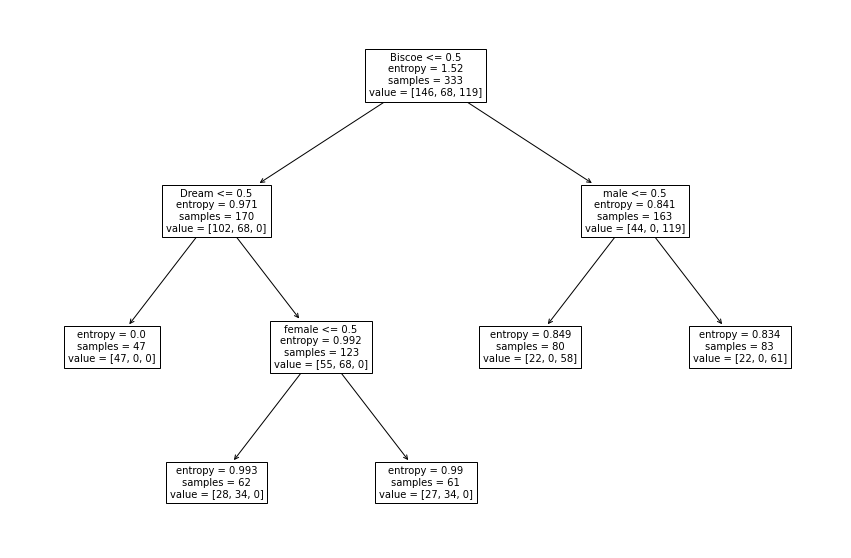

In [24]:
# solution here
y = discrete_penguin_dataset["species"]
X_transformed = discrete_penguin_dataset.iloc[:, :-1]
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X_transformed,y)
fig, ax = plt.subplots(figsize=(15, 10))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=X_transformed.columns)
plt.show()

9. Create the function `predict_discrete` that would predict the value of an instance using the output dictionary from the `id3` function. (*Hint*: you can check the class of an object using the `isinstance` function.)

In [25]:
def predict_discrete(tree, test_instance):
    while True:
        current_feature = list(tree.keys())[0]

        tree = tree[current_feature]["values"][test_instance[current_feature]]
        
        if not isinstance(tree, dict):
            return tree

10. Predict the label for the first record from the dataset. (*Hint*: use the Pandas method `iloc`.)

In [26]:
# solution here
print(predict_discrete(id3_result, discrete_penguin_dataset.iloc[0]))

1


11. Create the function `evaluate_discrete` that should return the accuracy of the model on a given set of records.

In [27]:
def evaluate_discrete(tree, test_data):
    labels = test_data.iloc[:, -1]
    test_data_input = test_data.iloc[:, :-1]
    n_total_tests = test_data.shape[0]
    n_correct_predictions = 0
    
    for i in range(n_total_tests):
        n_correct_predictions += predict_discrete(tree, test_data.iloc[i]) == labels[i]

    return n_correct_predictions / n_total_tests

12. Test the accuracy of the model on the whole penguin dataset.

In [28]:
# solution here
print(evaluate_discrete(id3_result, discrete_penguin_dataset))
print(dt.score(X_transformed, y))

0.7027027027027027
0.7027027027027027


13. Is the accuracy of the model 100%? If yes, why? If no, why?

*Answer here: The accuracy is not 1 because the data is redundant, we have the same records with different labels.*

## IV. Decision Tree - the continuous case (3.5 points)

*Note*: For this case all features will be treated as being continuous. Use the entire `penguin_dataset`!

1. In order to include the continuous random variables in the decision trees, we need to discretise them. For that, we will use thresholds.

A threshold will appear between two consecutive values of the same feature that have different labels (label = the value of the target attribute).

Write a function `get_thresholds` that finds the thresholds for a continuous feature. The function takes three arguments: the dataset, the continuous feature and the target feature that contains the labels.

In [3]:
def get_thresholds(dataset, feature, target_feature):
    # sort the unique values of feature
    # then check if two consecutive values have at least one different label
    feature_values = dict()
    unique_feature_values = np.sort(np.unique(dataset[feature]))
    thresholds = []
    for i in range(dataset.shape[0]):
        current_value = dataset[feature].iloc[i]
        current_target_value = dataset[target_feature].iloc[i]
        if current_value in feature_values:
            feature_values[current_value].add(current_target_value)
        else:
            feature_values[current_value] = {current_target_value}
    
    print(feature_values)

    for i in range(1, len(unique_feature_values)):
        current_val = unique_feature_values[i]
        prev_val = unique_feature_values[i-1]

        if (len(feature_values[prev_val]) > 1 and len(feature_values[prev_val] & feature_values[current_val]) > 0) or \
            (len(feature_values[prev_val]) == 1 and len(feature_values[current_val] - feature_values[prev_val]) > 0):
            thresholds.append((current_val + prev_val) / 2)
    
    return thresholds

2. Find the thresholds for the attribute `flipper_length_mm`.

In [4]:
# solution here
print(get_thresholds(penguin_dataset, "flipper_length_mm", "species"))

[177.0, 179.0, 180.5, 181.5, 184.5, 185.5, 186.5, 187.5, 188.5, 189.5, 190.5, 191.5, 192.5, 193.5, 194.5, 195.5, 196.5, 197.5, 198.5, 199.5, 200.5, 201.5, 202.5, 204.0, 205.5, 206.5, 207.5, 208.5, 209.5, 210.5, 211.5, 212.5]


3. Find the best threshold for the attribute `flipper_length_mm` using the information gain.

In [31]:
# solution here
thresholds = get_thresholds(penguin_dataset, "flipper_length_mm", "species")
feature = "flipper_length_mm"

best_ig = -1
best_threshold = 0        
for threshold in thresholds:
    dataset_copy = penguin_dataset.copy()
    dataset_copy[feature] = dataset_copy[feature] < threshold
    feature_ig = calculate_information_gain(dataset_copy, feature, target_feature)

    if feature_ig > best_ig:
        best_ig = feature_ig
        best_threshold = threshold

print(best_threshold, best_ig)

206.5 0.8065245715639433


4. Find the best feature and the best threshold to be used as root for the decision tree using the information gain.

In [32]:
# solution here
feature = "flipper_length_mm"

best_feature = ""
best_threshold = 0
best_ig = 0     
features = penguin_dataset.columns[:-1] 
target_feature = penguin_dataset.columns[-1] 
for feature in features:
    thresholds = get_thresholds(penguin_dataset, feature, target_feature)
    for threshold in thresholds:
        dataset_copy = penguin_dataset.copy()
        dataset_copy[feature] = dataset_copy[feature] < threshold
        feature_ig = calculate_information_gain(dataset_copy, feature, target_feature)

        if feature_ig > best_ig:
            best_ig = feature_ig
            best_threshold = threshold
            best_feature = feature

print("Best attribute =", best_feature, " best threshold =", best_threshold)

Best attribute = flipper_length_mm  best threshold = 206.5


5. Let's suppose that the root node is "flipper_length_mm" and the threshold 206.5. Create the variable `filtered_dataset` that should store the sub-tree for `flipper_length_mm < 206.5`. Do not drop the column if there are any other thresholds for the same attribute.

In [33]:
# solution here
filtered_dataset = penguin_dataset[penguin_dataset["flipper_length_mm"] < 206.5]
print(filtered_dataset)
# you can check the number of thresholds using the output from `get_thresholds`

     female  male  Biscoe  Dream  Torgersen  bill_length_mm  bill_depth_mm  \
0       0.0   1.0     0.0    0.0        1.0            39.1           18.7   
1       1.0   0.0     0.0    0.0        1.0            39.5           17.4   
2       1.0   0.0     0.0    0.0        1.0            40.3           18.0   
3       1.0   0.0     0.0    0.0        1.0            36.7           19.3   
4       0.0   1.0     0.0    0.0        1.0            39.3           20.6   
..      ...   ...     ...    ...        ...             ...            ...   
326     1.0   0.0     0.0    1.0        0.0            46.8           16.5   
327     1.0   0.0     0.0    1.0        0.0            45.7           17.0   
329     1.0   0.0     0.0    1.0        0.0            43.5           18.1   
330     0.0   1.0     0.0    1.0        0.0            49.6           18.2   
332     1.0   0.0     0.0    1.0        0.0            50.2           18.7   

     flipper_length_mm  body_mass_g  species  
0               

6. Create a function `id3_continuous` that runs the ID3 algorithm for the continuous case.

The output dictionary should have the same structure, with the following differences:
- the name of the root and of the internal nodes will not be just `feature name`, but `feature_name<threshold_value`.
- the keys of the "values" dictionary will be just "YES" (when the condition `feature<threshold` is met) and "NO" (otherwise)

You have an example in [output_example_continuous.txt](data/output_example_continuous.txt) file.


*Notes*: 
- Do NOT delete the chosen attribute if it has more than one threshold.

In [34]:
def id3_continuous(dataset):
    # we assume that the target attribute is the last column
    
    features = dataset.columns[:-1] 
    target_feature = dataset.columns[-1] 
    target_values = np.unique(dataset[target_feature])
    
    n_observations = dataset.shape[0]
    target_probs = generate_probabilities(dataset[target_feature].to_numpy().flatten())
    total_entropy = calculate_entropy(target_probs)

    if abs(total_entropy - 0) < 10**(-7):
        return target_values[0] 
    
    if len(features) == 0:
        return target_values[np.argmax(target_probs)]
    
    best_feature = ""
    best_threshold = 0
    best_n_thresholds = 0
    best_ig = 0
    for feature in features:
        thresholds = get_thresholds(dataset, feature, target_feature)
        
        for threshold in thresholds:
            dataset_copy = dataset.copy()
            dataset_copy[feature] = dataset_copy[feature] < threshold
            feature_ig = calculate_information_gain(dataset_copy, feature, target_feature)

            if feature_ig > best_ig:
                best_ig = feature_ig
                best_feature = feature
                best_threshold = threshold
                best_n_thresholds = len(thresholds)

    if best_ig == 0:
        return target_values[np.argmax(target_probs)]
            
    combined = f"{best_feature}<{best_threshold}"
    tree = {
        combined : {
            "total_entropy" : total_entropy,
            "observations" : {target_value : int(target_probs[i] * n_observations) for i, target_value in enumerate(target_values)},
            "values" : dict()
            
        }
    }
    
    filtered_dataset = dataset[dataset[best_feature] < best_threshold]
    if best_n_thresholds == 1:
        filtered_dataset = filtered_dataset.drop(columns = [best_feature])
    tree[combined]["values"]["YES"] = id3_continuous(filtered_dataset)

    filtered_dataset = dataset[dataset[best_feature] > best_threshold]
    if best_n_thresholds == 1:
        filtered_dataset = filtered_dataset.drop(columns = [best_feature])
    tree[combined]["values"]["NO"] = id3_continuous(filtered_dataset)

    return tree

7. Run the continuous version of ID3 algorithm on the `penguin_dataset` and store the tree in the variable `id3_continuous_result`. Print the tree. For a better visualisation, you can use `pprint`.

In [35]:
id3_continuous_result = id3_continuous(penguin_dataset)
pprint(id3_continuous_result)

{'flipper_length_mm<206.5': {'observations': {1: 146, 2: 68, 3: 119},
                             'total_entropy': 1.5200835543530913,
                             'values': {'NO': {'bill_depth_mm<17.65': {'observations': {1: 2,
                                                                                        2: 5,
                                                                                        3: 118},
                                                                       'total_entropy': 0.3596921222690145,
                                                                       'values': {'NO': {'bill_length_mm<46.55': {'observations': {1: 2,
                                                                                                                                   2: 5},
                                                                                                                  'total_entropy': 0.863120568566631,
                                              

8. Run the ID3 implemenation from `sklearn` and plot the decision tree. Compare the results. (*Hint*: `plt.subplots` has a parameter named `figsize` where you can control the width and the height of the plot; (25,10) should be enough.)

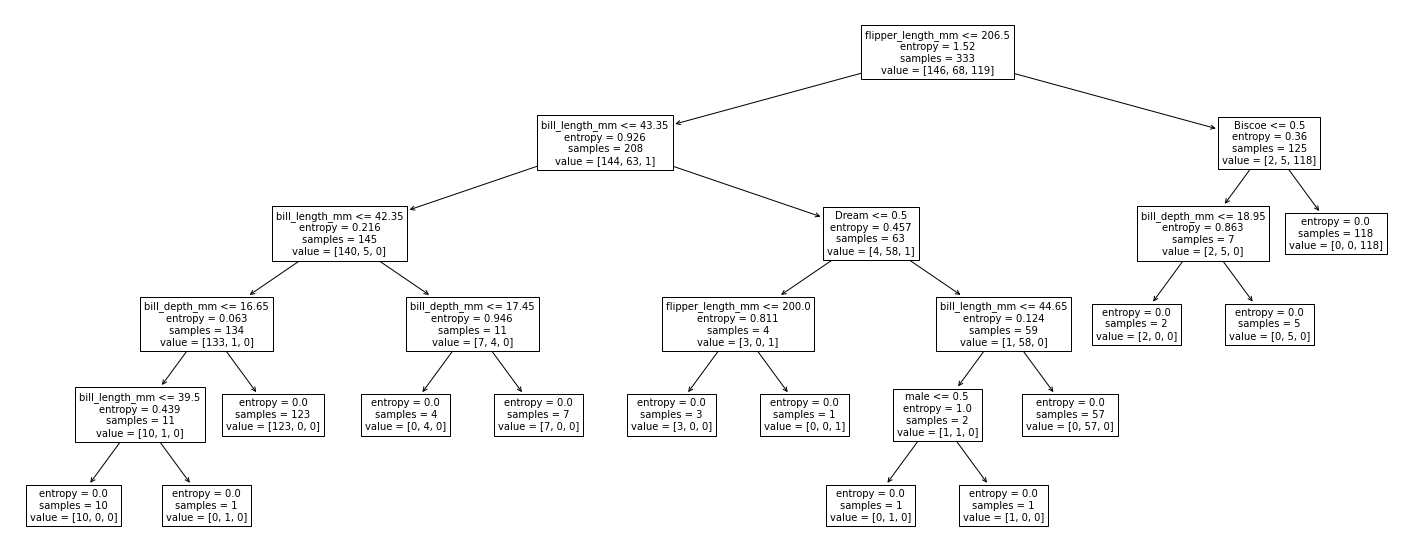

In [36]:
# solution here
y = penguin_dataset["species"]
X_transformed = penguin_dataset.iloc[:, :-1]
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X_transformed,y)
fig, ax = plt.subplots(figsize=(25, 10))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=X_transformed.columns)
plt.show()

9. Create the function `predict_continuous` that would predict the value of an instance using the output dictionary from the `id3` function. (*Hint*: the `split` method separates a string by a character)

In [37]:
def predict_continuous(tree, test_instance):
    while True:
        current_key = list(tree.keys())[0]
        current_feature, current_threshold = current_key.split("<")
        current_threshold = float(current_threshold)

        condition_result = "YES" if test_instance[current_feature] < current_threshold else "NO"
        tree = tree[current_key]["values"][condition_result]
        
        if not isinstance(tree, dict):
            return tree

10. Predict the label for the first record from the dataset.

In [38]:
# solution here
print(predict_continuous(id3_continuous_result, penguin_dataset.iloc[0]))

1


11. Create the function `evaluate_continuous` that should return the accuracy of the model on a given set of records.

In [39]:
def evaluate_continuous(tree, test_data):
    labels = test_data.iloc[:, -1]
    test_data_input = test_data.iloc[:, :-1]
    n_total_tests = test_data.shape[0]
    n_correct_predictions = 0
    
    for i in range(n_total_tests):
        n_correct_predictions += predict_continuous(tree, test_data.iloc[i]) == labels[i]

    return n_correct_predictions / n_total_tests

12. Test the accuracy of the model on the whole penguin dataset.

In [40]:
# solution here
print(evaluate_continuous(id3_continuous_result, penguin_dataset))
print(dt.score(X_transformed, y))

1.0
1.0


13. Modify the `id3_continuous` function so it will allow pruning. (*Hint*: use a second parameter, `max_depth` to control the number of tree levels,)

In [41]:
def id3_continuous(dataset, max_depth = -1):
    # we assume that the target attribute is the last column
    
    features = dataset.columns[:-1] 
    target_feature = dataset.columns[-1] 
    target_values = np.unique(dataset[target_feature])
    
    n_observations = dataset.shape[0]
    target_probs = generate_probabilities(dataset[target_feature].to_numpy().flatten())
    total_entropy = calculate_entropy(target_probs)

    if abs(total_entropy - 0) < 10**(-7):
        return target_values[0] 
    
    if len(features) == 0 or max_depth == 0:
        return target_values[np.argmax(target_probs)]
    
    best_feature = ""
    best_threshold = 0
    best_n_thresholds = 0
    best_ig = 0
    for feature in features:
        thresholds = get_thresholds(dataset, feature, target_feature)
        
        for threshold in thresholds:
            dataset_copy = dataset.copy()
            dataset_copy[feature] = dataset_copy[feature] < threshold
            feature_ig = calculate_information_gain(dataset_copy, feature, target_feature)

            if feature_ig > best_ig:
                best_ig = feature_ig
                best_feature = feature
                best_threshold = threshold
                best_n_thresholds = len(thresholds)
            
    combined = f"{best_feature}<{best_threshold}"
    tree = {
        combined : {
            "total_entropy" : total_entropy,
            "observations" : {target_value : int(target_probs[i] * n_observations) for i, target_value in enumerate(target_values)},
            "values" : dict()
            
        }
    }
    
    filtered_dataset = dataset[dataset[best_feature] < best_threshold]
    if best_n_thresholds == 1:
        filtered_dataset = filtered_dataset.drop(columns = [best_feature])
    tree[combined]["values"]["YES"] = id3_continuous(filtered_dataset, max_depth - 1)

    filtered_dataset = dataset[dataset[best_feature] > best_threshold]
    if best_n_thresholds == 1:
        filtered_dataset = filtered_dataset.drop(columns = [best_feature])
    tree[combined]["values"]["NO"] = id3_continuous(filtered_dataset, max_depth - 1)

    return tree

14. Apply the prunned version of ID3 (using the custom and the `sklearn` implementation) with `max_depth = 2`. Compare the results.

{'flipper_length_mm<206.5': {'observations': {1: 146, 2: 68, 3: 119},
                             'total_entropy': 1.5200835543530913,
                             'values': {'NO': {'bill_depth_mm<17.65': {'observations': {1: 2,
                                                                                        2: 5,
                                                                                        3: 118},
                                                                       'total_entropy': 0.3596921222690145,
                                                                       'values': {'NO': 2,
                                                                                  'YES': 3}}},
                                        'YES': {'bill_length_mm<43.35': {'observations': {1: 144,
                                                                                          2: 62,
                                                                                          

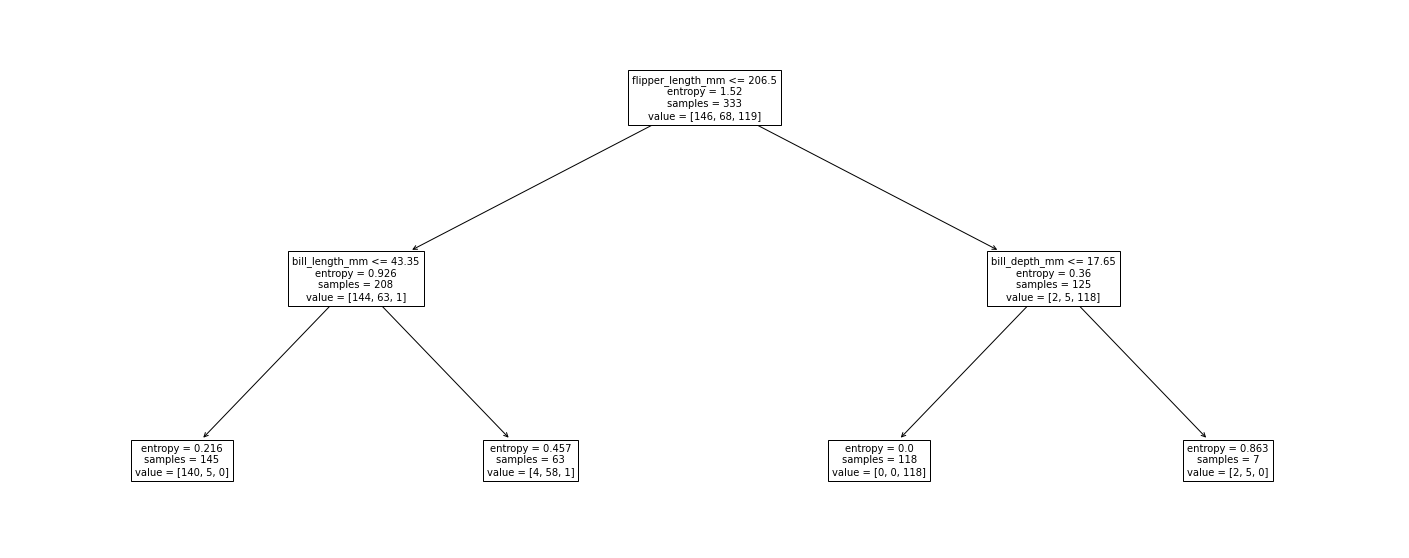

In [42]:
# solution here
id3_continuous_result_pruned = id3_continuous(penguin_dataset, 2)
pprint(id3_continuous_result_pruned)

y = penguin_dataset["species"]
X_transformed = penguin_dataset.iloc[:, :-1]
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X_transformed,y)
fig, ax = plt.subplots(figsize=(25, 10))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=X_transformed.columns)
plt.show()

Credits: some part of the implementation was inspired by https://medium.com/geekculture/step-by-step-decision-tree-id3-algorithm-from-scratch-in-python-no-fancy-library-4822bbfdd88f